In [1]:
import sys
import os
import glob

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import mpl_toolkits.axisartist
# from mpl_toolkits.axes_grid1 import host_subplot

import scipy.interpolate
import pandas as pd

# import statsmodels.formula.api as smformula
# import dateutil
# from collections import OrderedDict

from IPython.display import display, HTML
%matplotlib notebook
plt.style.use('seaborn-paper')

# special-ish extensions
# %load_ext Cython

In [2]:
# constants
FN = '2017_MAT_rep{}data.xlsx'
treatments = ['Low', 'High', 'Super High']

In [3]:
def load_rep_catch_data(rep, filename_pattern):
    df = pd.read_excel(filename_pattern.format(rep))

    if rep in [1,2]:
        foo = df[['Date Collected','Treatment','Row','Trap #','Pink','Blue','Yellow','Arc Yellow']].copy(deep=True)
        foo = foo[pd.notnull(foo['Date Collected'])]
        foo.loc[:,['Pink','Blue','Yellow','Arc Yellow']] = foo.loc[:,['Pink','Blue','Yellow','Arc Yellow']].fillna(value=0)
        foo['Total'] = foo.loc[:,['Pink','Blue','Yellow','Arc Yellow']].sum(axis=1)
    else:
        foo = df[['Date','Treatment','Row','Trap #','# recaptured']].copy(deep=True)
        foo.rename(columns={'Date':'Date Collected', '# recaptured':'Total'}, inplace=True)
        foo = foo[pd.notnull(foo['Date Collected'])]
        foo['Total'] = foo['Total'].fillna(value=0)

    return foo

## Trap locations

In [4]:
COLSPACE = 1 # distance between trees along a row
ROWSPACE = 1 # distance between rows

FIRST_ROW_BREAK_DIST = 40 # distance between traps 4 and 5 on first row 

# Trap x positions
# even rows (starting with 0)
tx0 = (np.linspace(0, 90, 4)+15)*COLSPACE
tx0 = np.concatenate((tx0, [0*COLSPACE, 30*COLSPACE]+tx0[-1]+FIRST_ROW_BREAK_DIST*COLSPACE))
# odd rows
tx1 = (np.linspace(0, 90, 4)+30)*COLSPACE
tx1 = np.concatenate((tx1, [0*COLSPACE]+tx1[-1]+FIRST_ROW_BREAK_DIST*COLSPACE))

# nominal trap positions
tx = []
ty = []
for row in range(5,50+1, 5):
    if row%10 == 5:
        tx.extend(tx0)
        ty.extend([row*ROWSPACE]*len(tx0))
    else:
        tx.extend(tx1)
        ty.extend([row*ROWSPACE]*len(tx1))

# high block positions
hbx = []
hby = []
for row in range(5,50+1, 5):
    if row%10 == 5:
        hbx.extend(tx1)
        hby.extend([row*ROWSPACE]*len(tx1))
    else:
        hbx.extend(tx0)
        hby.extend([row*ROWSPACE]*len(tx0))

# super-high block positions
tmp = np.linspace(0, 120, 17)
tmp = tmp*COLSPACE
shbx0 = np.concatenate((tmp, np.linspace(0,30,5)+(105+FIRST_ROW_BREAK_DIST)))
shbx0 = shbx0[np.in1d(shbx0, tx0, invert=True)]
shbx1 = np.concatenate((tmp+15*COLSPACE, np.linspace(0,30,5)+(105+FIRST_ROW_BREAK_DIST)))
shbx1 = shbx1[np.in1d(shbx1, tx1, invert=True)]
shbx = []
shby = []
for row in range(5,50+1, 5):
    if row%10 == 5:
        shbx.extend(shbx0)
        shby.extend([row*ROWSPACE]*len(shbx0))
    else:
        shbx.extend(shbx1)
        shby.extend([row*ROWSPACE]*len(shbx1))


<IPython.core.display.Javascript object>


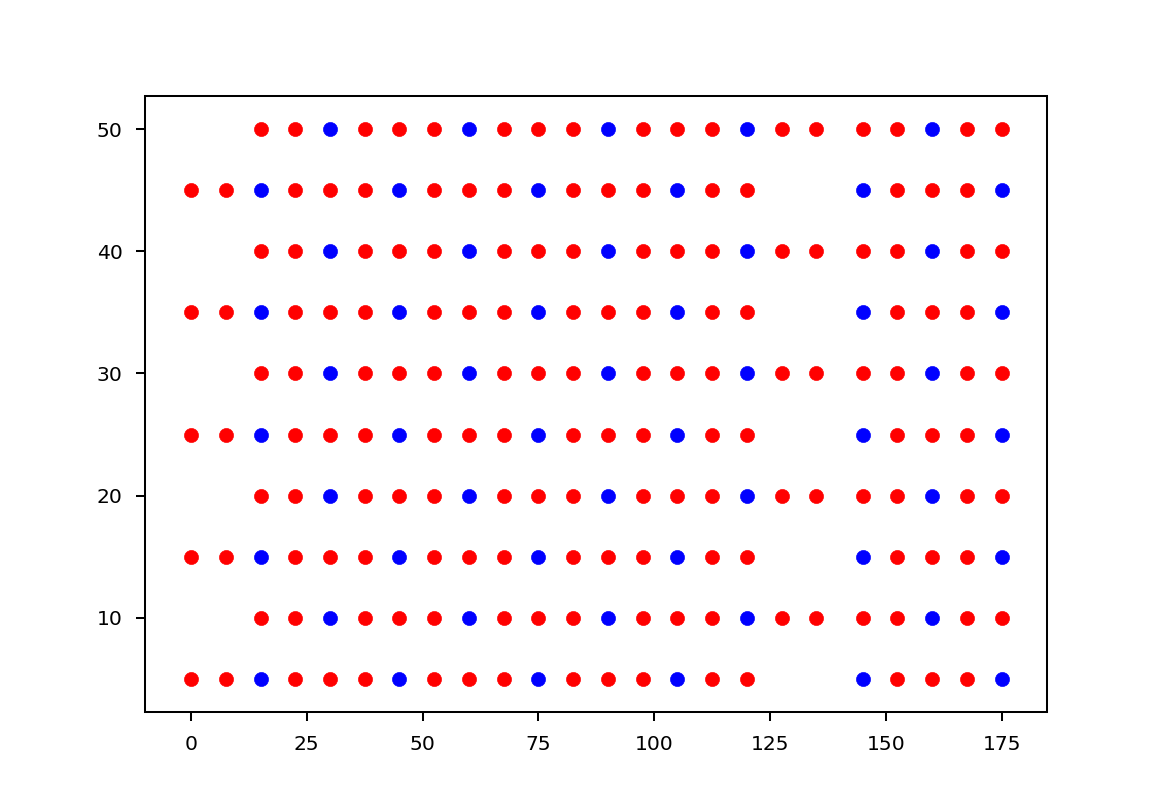

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(tx, ty, color='b')
ax.scatter(shbx, shby, color='r')

#ax.set_aspect('equal','datalim')


<IPython.core.display.Javascript object>


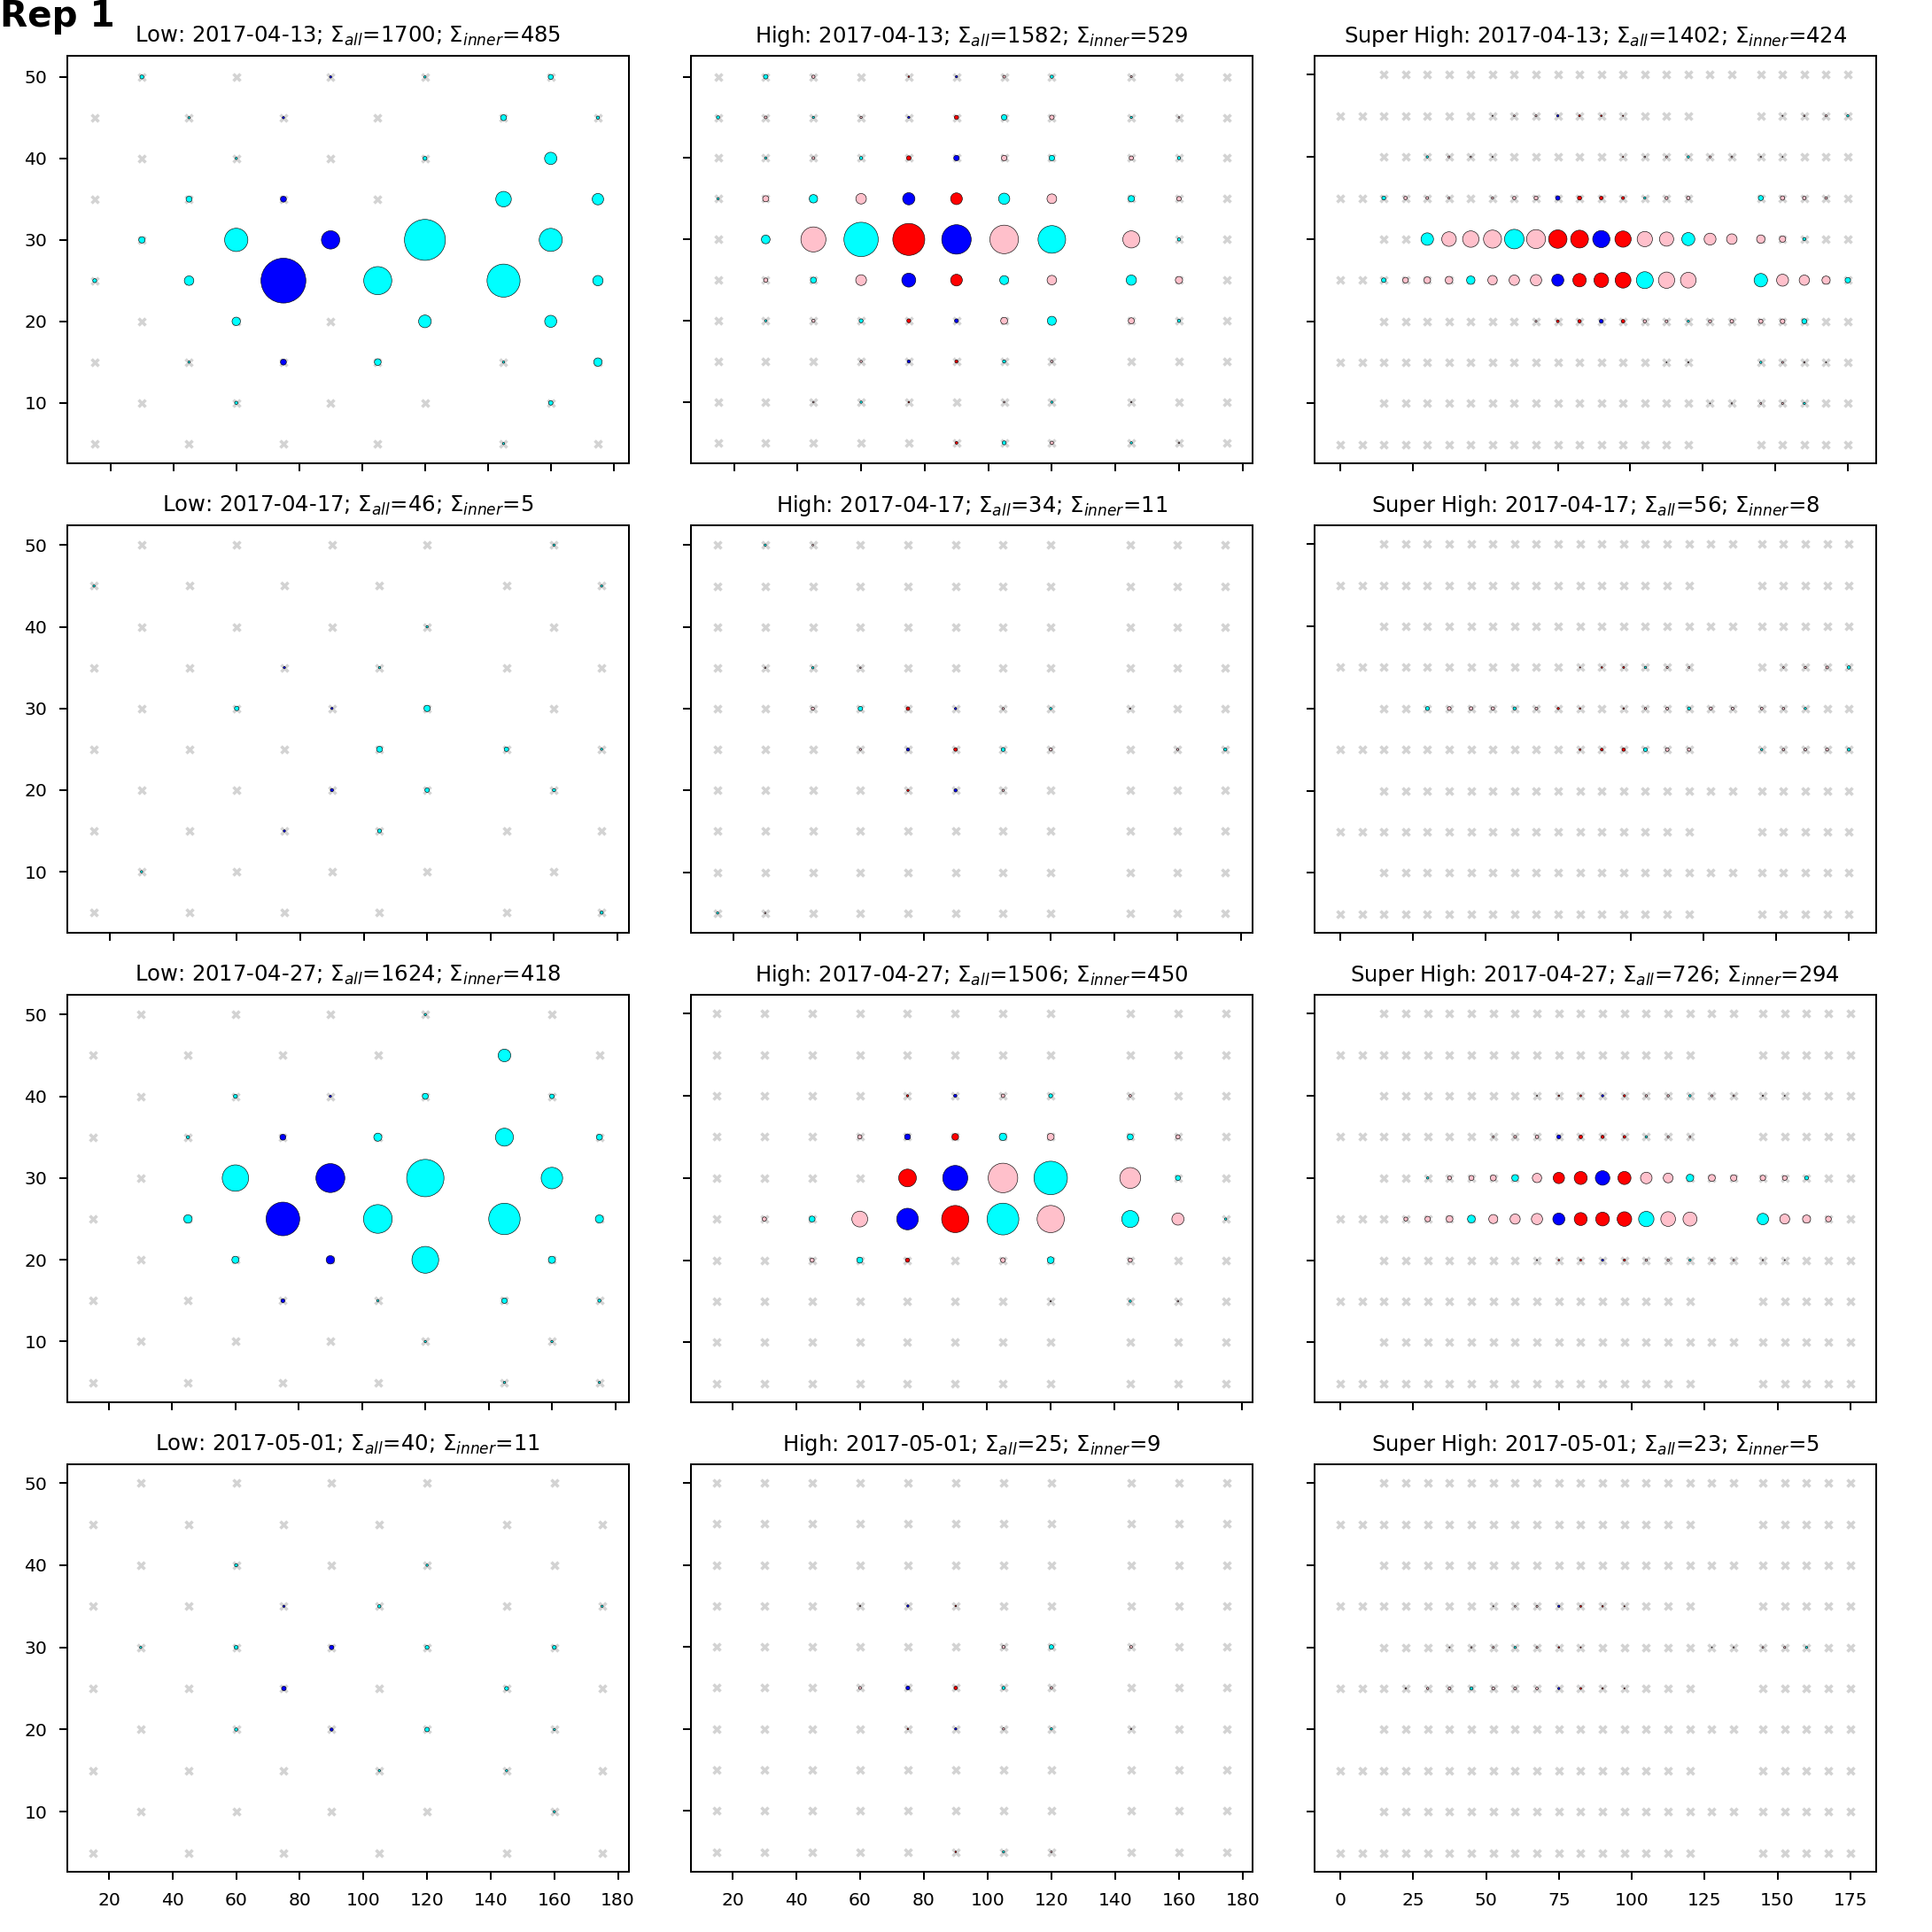

Low: 2017-04-13; $\Sigma_{all}$=1700; $\Sigma_{inner}$=485
Low: 2017-04-17; $\Sigma_{all}$=46; $\Sigma_{inner}$=5
Low: 2017-04-27; $\Sigma_{all}$=1624; $\Sigma_{inner}$=418
Low: 2017-05-01; $\Sigma_{all}$=40; $\Sigma_{inner}$=11
High: 2017-04-13; $\Sigma_{all}$=1582; $\Sigma_{inner}$=529
High: 2017-04-17; $\Sigma_{all}$=34; $\Sigma_{inner}$=11
High: 2017-04-27; $\Sigma_{all}$=1506; $\Sigma_{inner}$=450
High: 2017-05-01; $\Sigma_{all}$=25; $\Sigma_{inner}$=9
Super High: 2017-04-13; $\Sigma_{all}$=1402; $\Sigma_{inner}$=424
Super High: 2017-04-17; $\Sigma_{all}$=56; $\Sigma_{inner}$=8
Super High: 2017-04-27; $\Sigma_{all}$=726; $\Sigma_{inner}$=294
Super High: 2017-05-01; $\Sigma_{all}$=23; $\Sigma_{inner}$=5


<IPython.core.display.Javascript object>


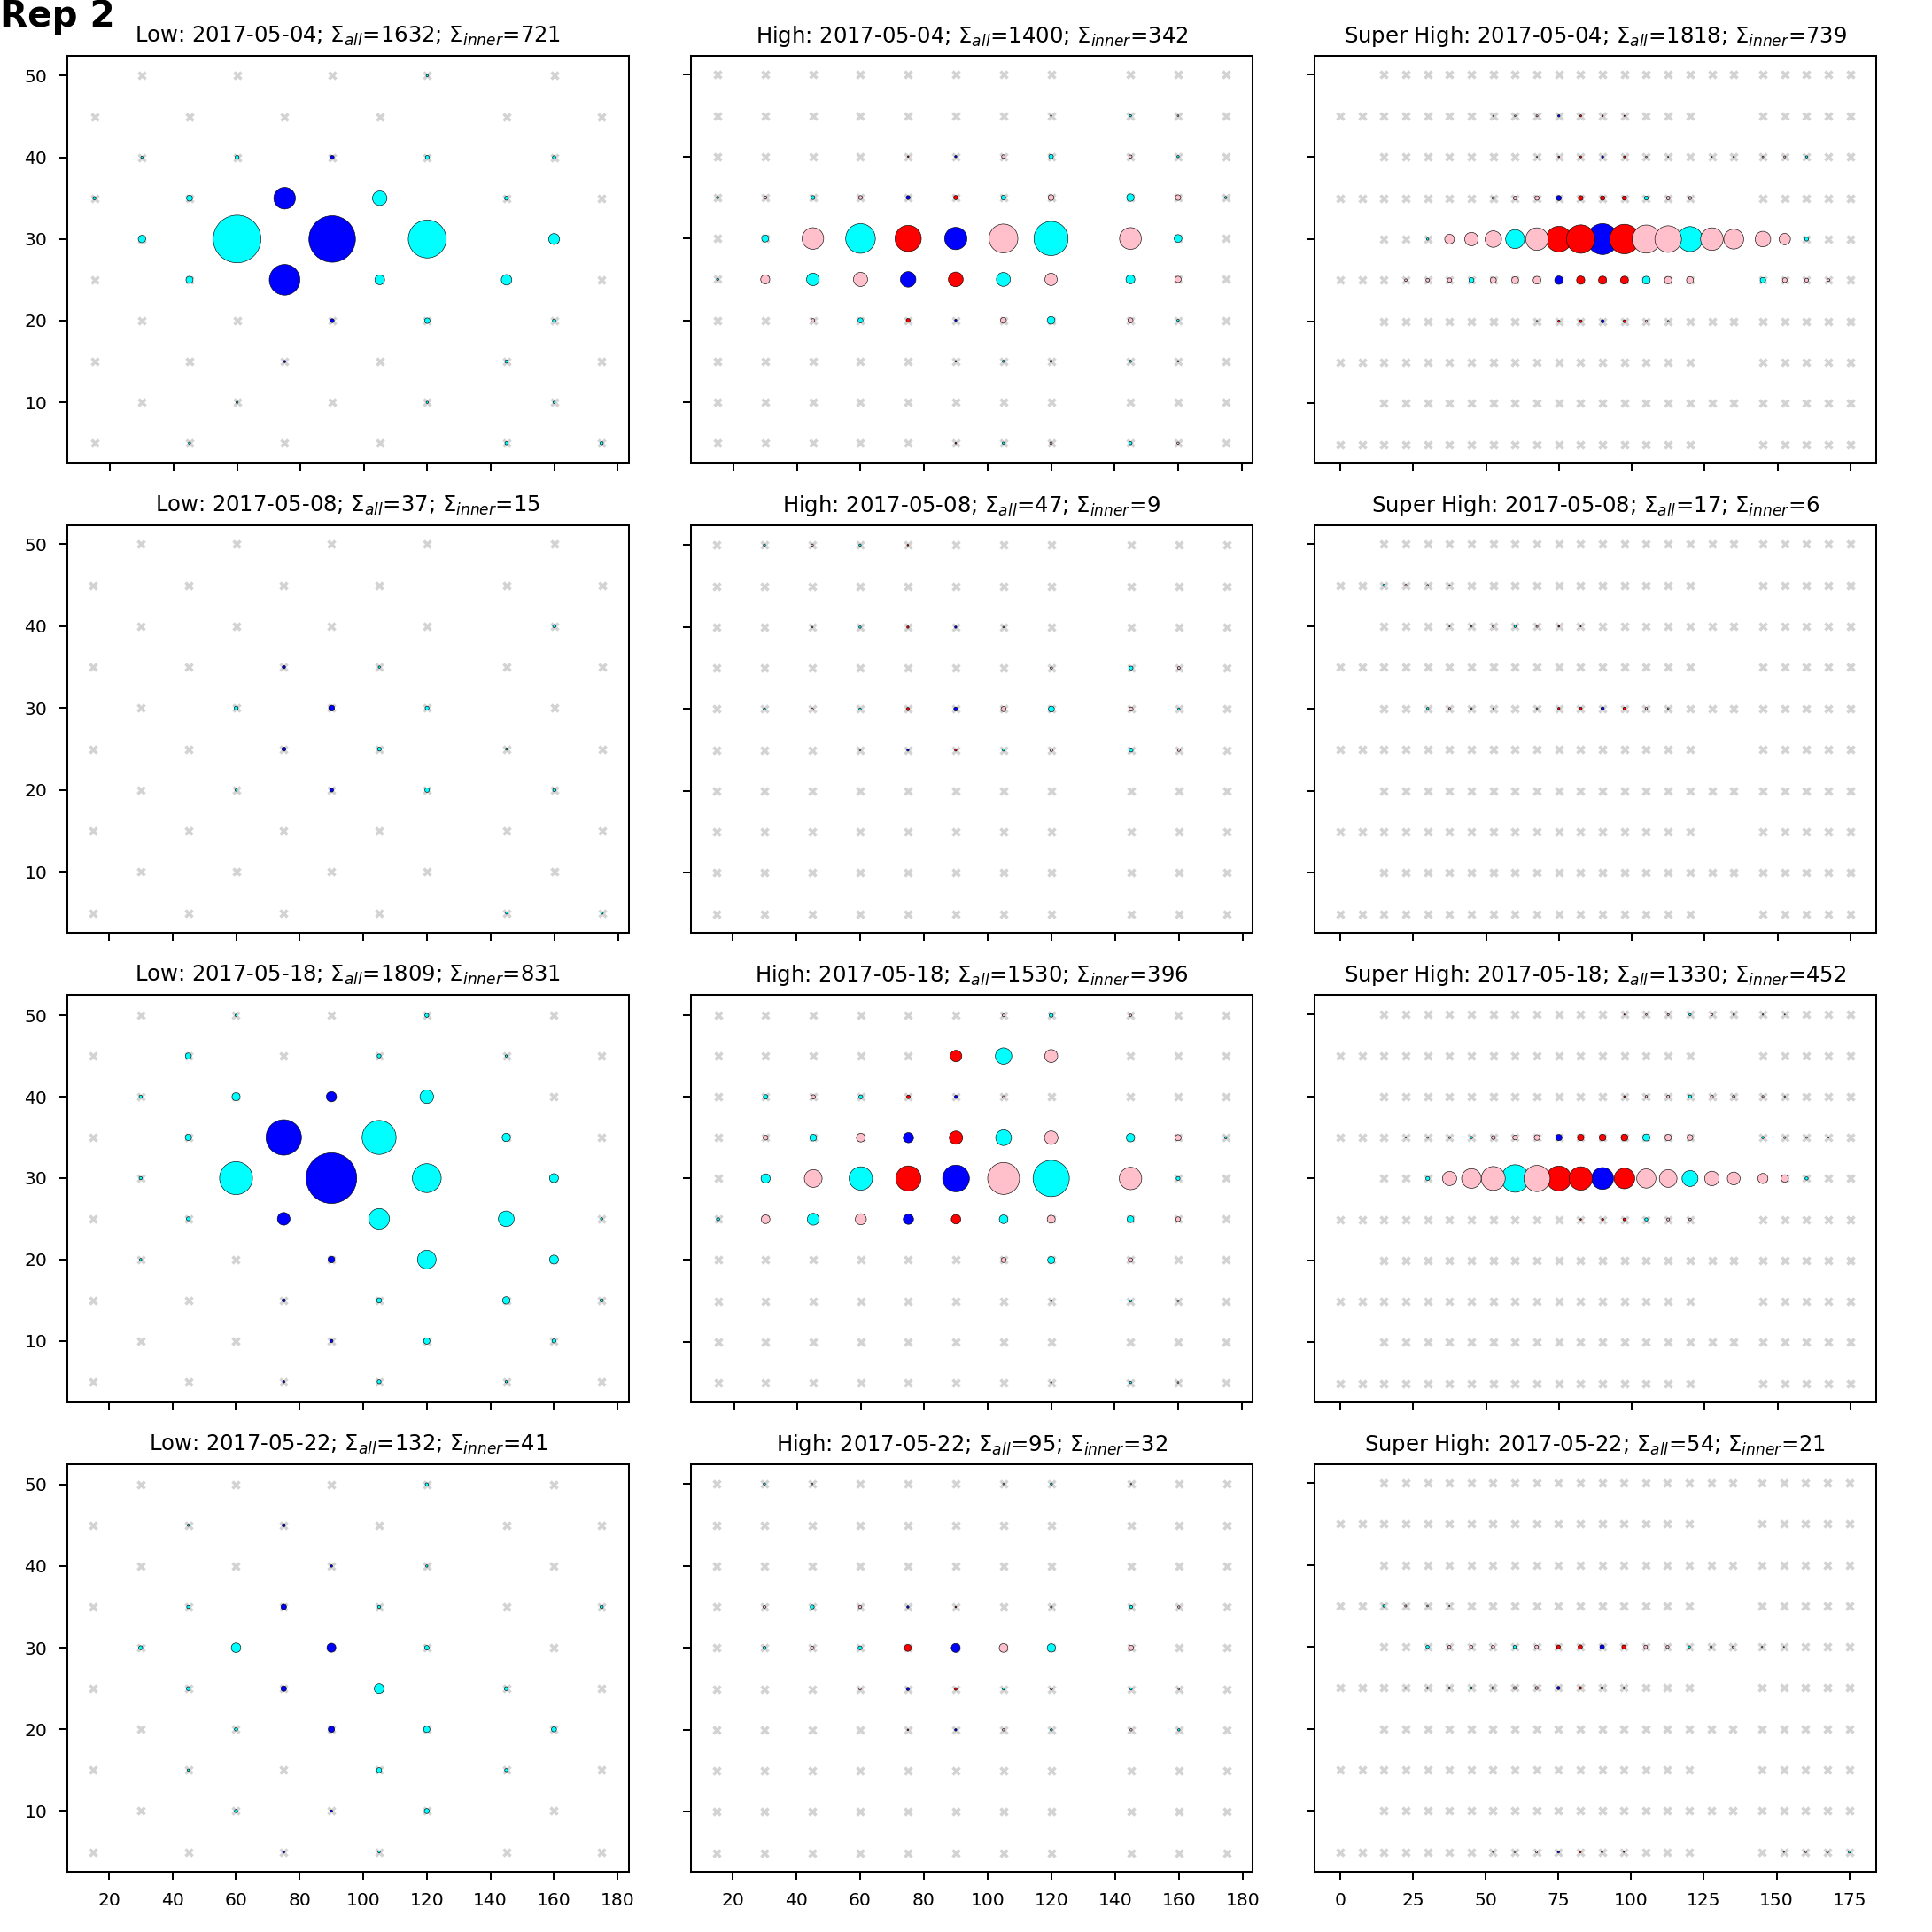

Low: 2017-05-04; $\Sigma_{all}$=1632; $\Sigma_{inner}$=721
Low: 2017-05-08; $\Sigma_{all}$=37; $\Sigma_{inner}$=15
Low: 2017-05-18; $\Sigma_{all}$=1809; $\Sigma_{inner}$=831
Low: 2017-05-22; $\Sigma_{all}$=132; $\Sigma_{inner}$=41
High: 2017-05-04; $\Sigma_{all}$=1400; $\Sigma_{inner}$=342
High: 2017-05-08; $\Sigma_{all}$=47; $\Sigma_{inner}$=9
High: 2017-05-18; $\Sigma_{all}$=1530; $\Sigma_{inner}$=396
High: 2017-05-22; $\Sigma_{all}$=95; $\Sigma_{inner}$=32
Super High: 2017-05-04; $\Sigma_{all}$=1818; $\Sigma_{inner}$=739
Super High: 2017-05-08; $\Sigma_{all}$=17; $\Sigma_{inner}$=6
Super High: 2017-05-18; $\Sigma_{all}$=1330; $\Sigma_{inner}$=452
Super High: 2017-05-22; $\Sigma_{all}$=54; $\Sigma_{inner}$=21


<IPython.core.display.Javascript object>


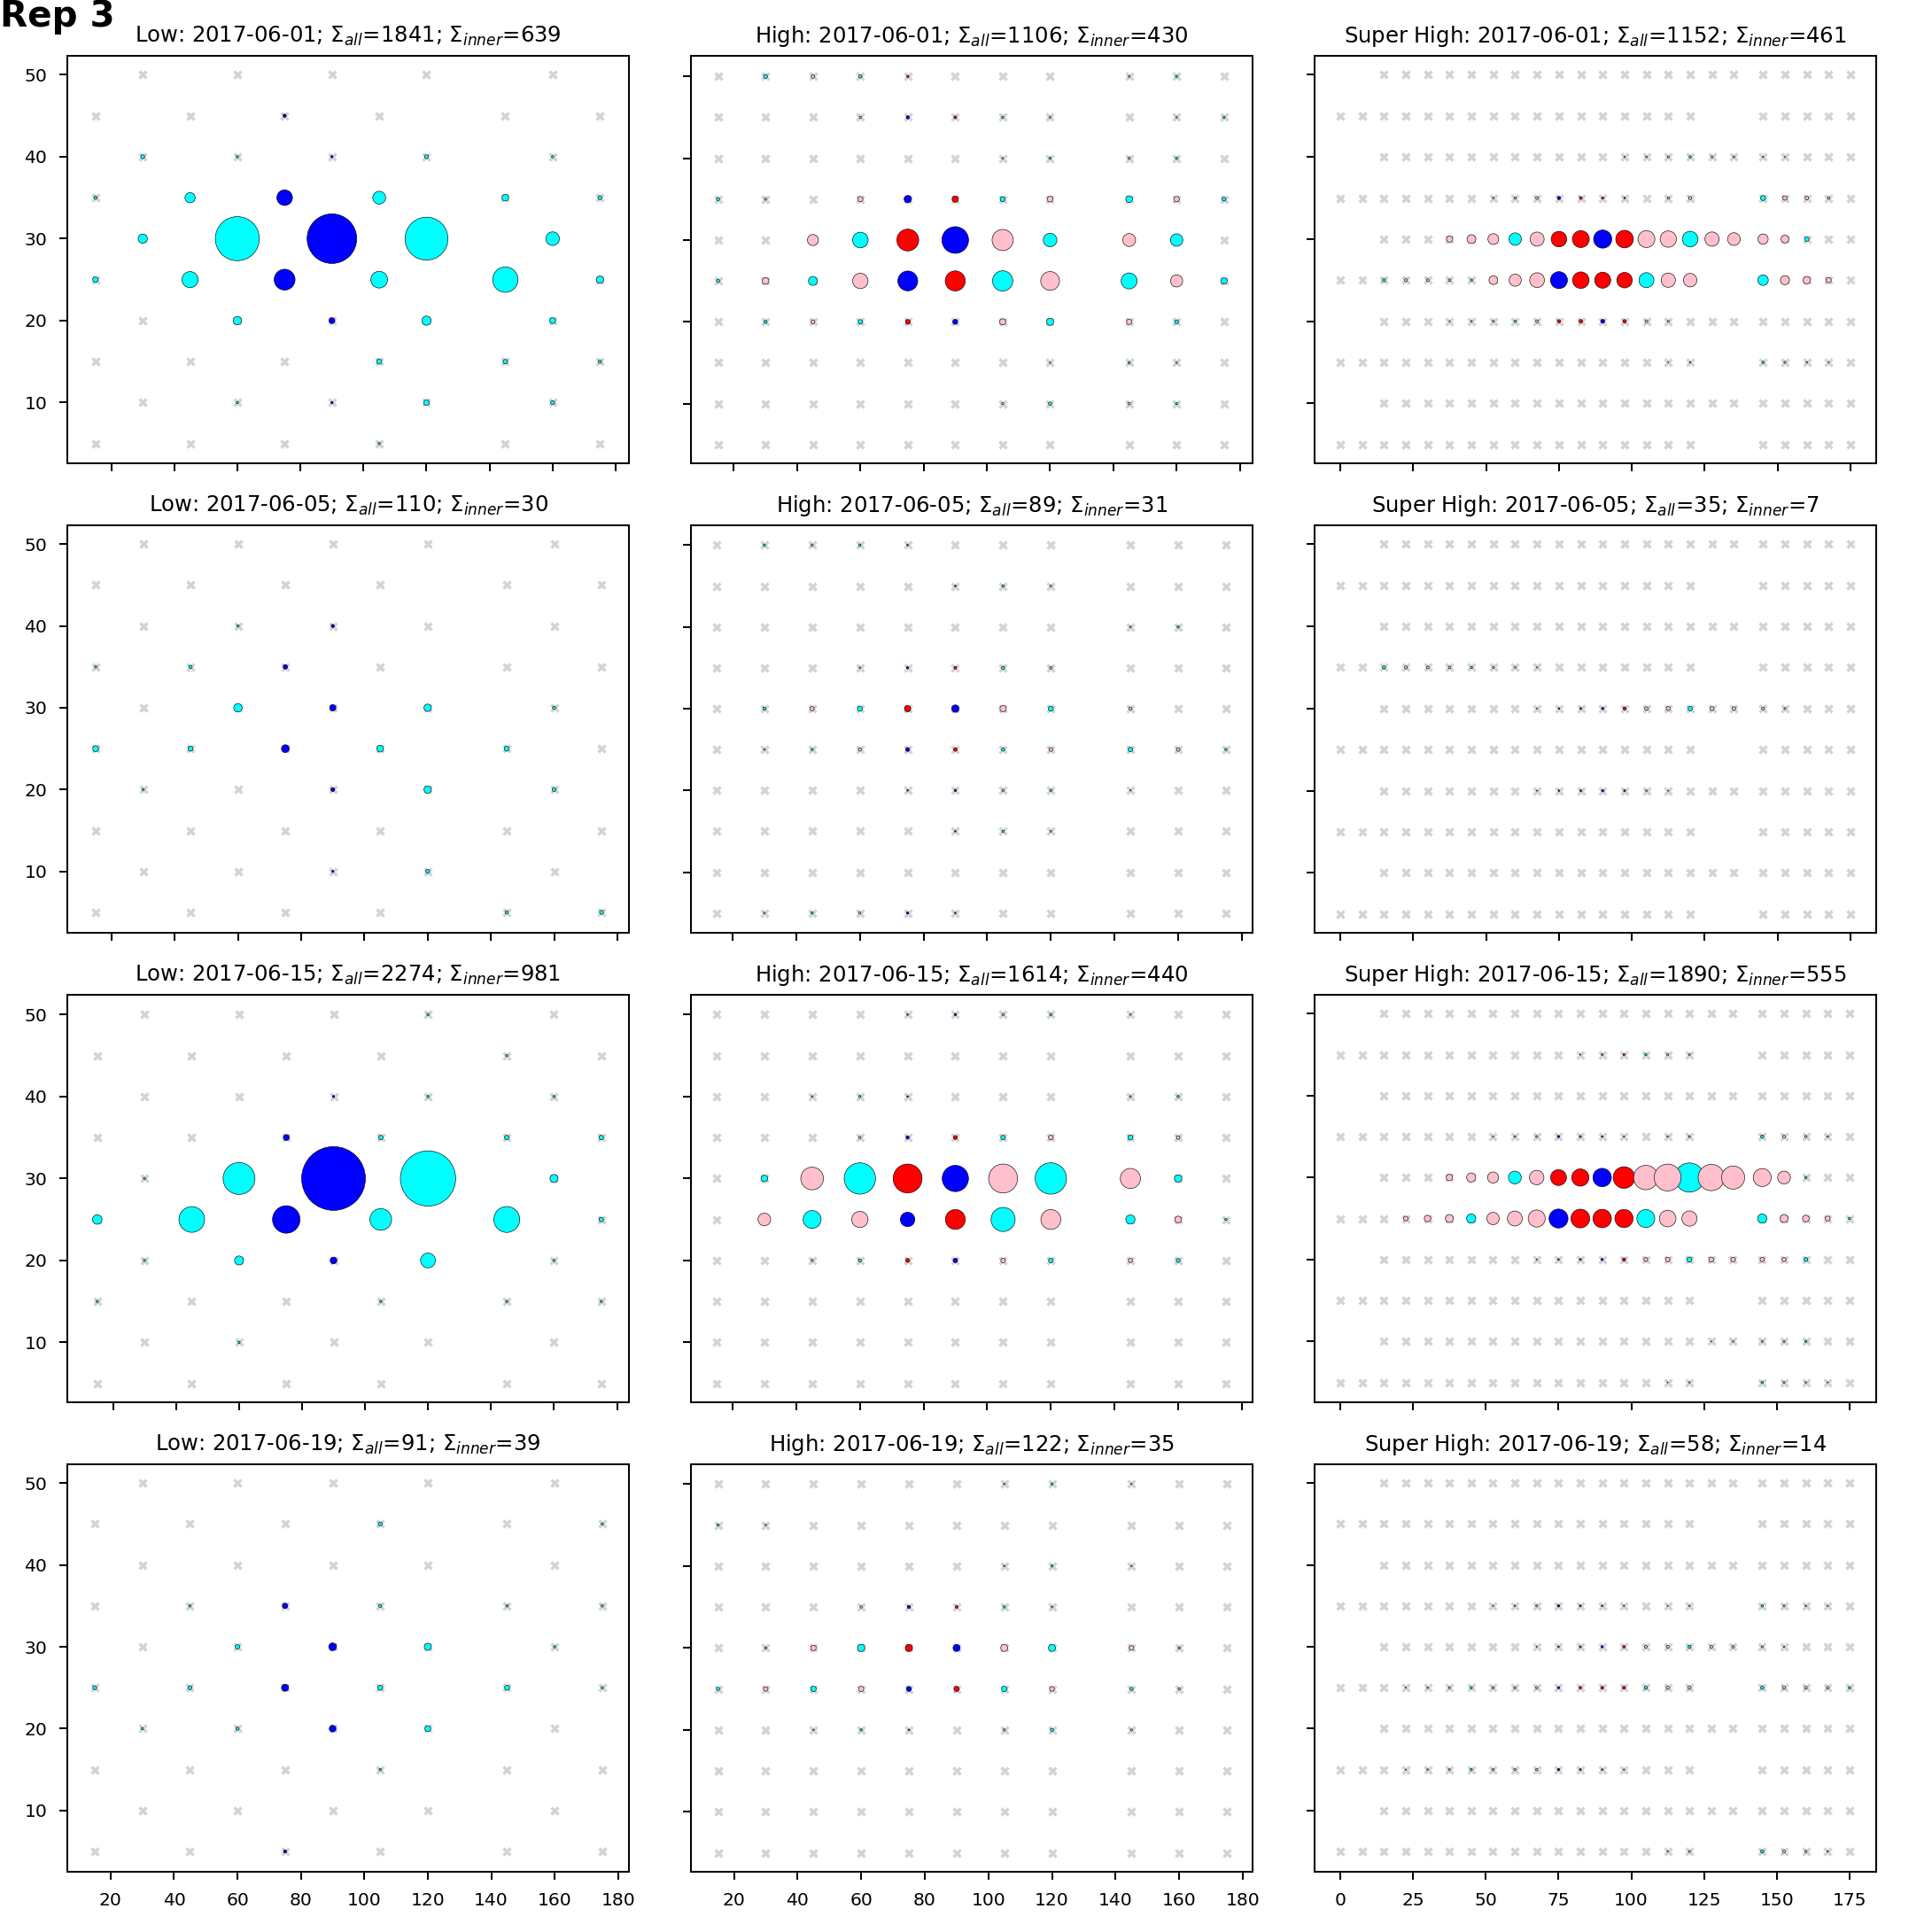

Low: 2017-06-01; $\Sigma_{all}$=1841; $\Sigma_{inner}$=639
Low: 2017-06-05; $\Sigma_{all}$=110; $\Sigma_{inner}$=30
Low: 2017-06-15; $\Sigma_{all}$=2274; $\Sigma_{inner}$=981
Low: 2017-06-19; $\Sigma_{all}$=91; $\Sigma_{inner}$=39
High: 2017-06-01; $\Sigma_{all}$=1106; $\Sigma_{inner}$=430
High: 2017-06-05; $\Sigma_{all}$=89; $\Sigma_{inner}$=31
High: 2017-06-15; $\Sigma_{all}$=1614; $\Sigma_{inner}$=440
High: 2017-06-19; $\Sigma_{all}$=122; $\Sigma_{inner}$=35
Super High: 2017-06-01; $\Sigma_{all}$=1152; $\Sigma_{inner}$=461
Super High: 2017-06-05; $\Sigma_{all}$=35; $\Sigma_{inner}$=7
Super High: 2017-06-15; $\Sigma_{all}$=1890; $\Sigma_{inner}$=555
Super High: 2017-06-19; $\Sigma_{all}$=58; $\Sigma_{inner}$=14


In [11]:
innerx0 = tx0[2]*COLSPACE # incluse
innerx1 = tx0[3]*COLSPACE # not inclusive

treatments = ['Low', 'High', 'Super High']

for rep in [1,2,3]:
    df = load_rep_catch_data(rep, FN)
    # and x,y cols for positions
    df['x'] = df.apply(lambda r: tx0[int(r['Trap #'])-1] 
                       if int(r['Row']%10) == 5
                       else tx1[int(r['Trap #'])-1],
                       axis=1) 
    df['y'] = df['Row']
    df['x'] = df['x'] * COLSPACE
    df['y'] = df['y'] * ROWSPACE
    
    fig = plt.figure(figsize=(12,12))
    gs = mpl.gridspec.GridSpec(4,len(treatments))

    for ti, treatment in enumerate(treatments):
        tmp = df[df['Treatment'] == treatment]
        service_dates = pd.to_datetime(tmp['Date Collected'].unique())
        assert len(service_dates) == 4

        if treatment == 'High':
            bx = hbx
            by = hby
        elif treatment == 'Super High':
            bx = shbx
            by = shby
        else:
            assert treatment == 'Low'
            bx = []
            by = []
            
        for di, service_date in enumerate(service_dates):
            foo = df[df['Treatment'] == treatment].copy(deep=True)
            foo = foo[foo['Date Collected'] == service_date]

            foo['isTrap'] = True
            foo_traps = foo.copy(deep=True) # keep a copy of just the traps
            
            # Add in the blocks
            foo = foo.append(pd.DataFrame({'x':bx, 'y':by}),
                       ignore_index=True)
            foo.sort_values(['y','x'], inplace=True)
            foo.reset_index(inplace=True, drop=True)
            
            # interpolate
            ## 1D (row wise) interpolation
            out = foo.copy(deep=True)
            out['iT'] = np.nan
            for row in sorted(foo['y'].unique()):
                tmp = foo[foo['y']==row].sort_values('x')
                tmp2 = tmp.dropna(subset=['Total'])
                iT = scipy.interpolate.interp1d(tmp2['x'], tmp2['Total'], 
                                                kind='linear', copy=True, bounds_error=False, 
                                                fill_value=np.nan, assume_sorted=False)(tmp['x'])
                out.loc[tmp.index,'iT'] = iT
                
            # sums
            tmp = out#.copy(deep=True)
            sum_all = tmp['iT'].sum()
            tmp = tmp[(tmp['x']>=innerx0) & (tmp['x']<innerx1)] # restrict to inner columns
            #tmp = tmp[(tmp['y']>=25) & (tmp['y']<=30)] # restrict rows too?
            sum_inner_cols = tmp['iT'].sum()
            
            # Plot
            ax = fig.add_subplot(gs[di,ti])
            # all traps+hats (markers)
            ax.scatter(x=out['x'], y=out['y'], s=10, marker='x', color='lightgray')

            # inner
            tmp1 = out[(out['x']>=innerx0) & (out['x']<innerx1)]
            tmp = tmp1[tmp1['isTrap']==True]
            ax.scatter(tmp['x'], tmp['y'], tmp['iT'], color='b', edgecolor='k')
            tmp = tmp1[tmp1['isTrap']!=True]
            ax.scatter(tmp['x'], tmp['y'], tmp['iT'], color='r', edgecolor='k')
            
            # non inner
            tmp2 = out.loc[out.index.difference(tmp1.index)]
            tmp = tmp2[tmp2['isTrap']==True]
            ax.scatter(tmp['x'], tmp['y'], tmp['iT'], color='cyan', edgecolor='k')
            tmp = tmp2[tmp2['isTrap']!=True]
            ax.scatter(tmp['x'], tmp['y'], tmp['iT'], color='pink', edgecolor='k')

            #ax.set_aspect('equal','datalim')
            
            t = "{}: {}".format(treatment, pd.to_datetime(service_date).strftime('%Y-%m-%d'))
            t += r"; $\Sigma_{all}$="+str(int(sum_all))
            t += r"; $\Sigma_{inner}$="+str(int(sum_inner_cols))
            ax.set_title(t)
            print(t)

            if ti>0:
                ax.set_yticklabels([])
            if di<len(service_dates)-1:
                ax.set_xticklabels([])
            
#             break
#         break
                
    ax.text(0,1, 'Rep {}'.format(rep), transform=fig.transFigure, fontsize=16, fontweight='bold', va='top', ha='left')

    # gs.tight_layout(fig, rect=[])
    fig.tight_layout()

    fig.savefig('rep{}_inferred.png'.format(rep))
#     break

In [7]:
## 2D interpolation
# @TCC Doesn't seem to work for the cross-transect nature of the data (y and x distances aren't equivalent)

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)

# tmp = foo[foo['isTrap']==True]
# x = tmp['x']
# y = tmp['y']
# z = tmp['Total']
# ax.scatter(x, y, z, color='b')

# tmp = foo[foo['isTrap']!=True]
# x2 = tmp['x']
# y2 = tmp['y']
# z2 = scipy.interpolate.griddata(list(zip(x,y)), z, list(zip(x2,y2)), method='linear', fill_value=np.nan, rescale=False)
# ax.scatter(x2, y2, z2, color='r')